# Importing the libraries

In [2]:
import pandas as pd
import numpy as np

# Importing the dataset

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
x=df.drop("Purchased", axis=1)
y=df["Purchased"]

In [5]:
x=pd.DataFrame(data=x)
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [6]:
y=pd.DataFrame(data=y)
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [7]:
print(x.shape)
print(y.shape)

(400, 2)
(400, 1)


# Visualizing the dataset

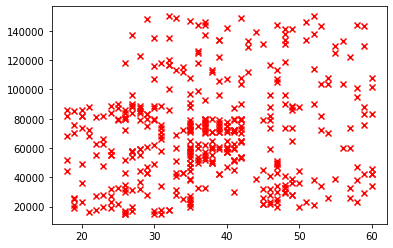

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df.Age,df.EstimatedSalary, marker="x", c="r")

# Splitting the dataset into training set and test set

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(320, 2)
(80, 2)


# Feature Scaling

In [11]:
from sklearn import preprocessing
Std = preprocessing.StandardScaler()
model = Std.fit_transform(x,y)
pd.DataFrame(data=model)

,0,1
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


# Training the Random Forest model on the training set

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
classifier_rf = RandomForestClassifier(random_state=42, n_estimators=10,  criterion='entropy')
classifier_rf.fit(X_train,y_train)
classifier_rf.score(X_train,y_train)

C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_11912\2100215040.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rf.fit(X_train,y_train)


0.984375

# Predicting new result

In [25]:
y_pred=classifier_rf.predict(X_test)
y_pred
df1 = pd.DataFrame(data=y_pred)
df1

,0
0,1
1,1
2,0
3,1
4,0
...,...
75,0
76,1
77,1
78,0


In [26]:
df2= pd.DataFrame(data=y_test)
df2

,Purchased
209,0
280,1
33,0
210,1
93,0
...,...
246,0
227,1
369,1
176,0


# Making the confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
pd.DataFrame(data=cm)

,0,1
0,47,5
1,5,23


# Hyperparameter tunning

In [19]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


C:\Users\SAKSHI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [20]:
grid_search.best_score_


0.9125

In [21]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [22]:
classifier_rf = RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=50,n_jobs=-1, random_state=42)
classifier_rf.fit(X_train,y_train)
classifier_rf.score(X_train,y_train)

C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_11912\2148748922.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rf.fit(X_train,y_train)


0.91875

# Visualization

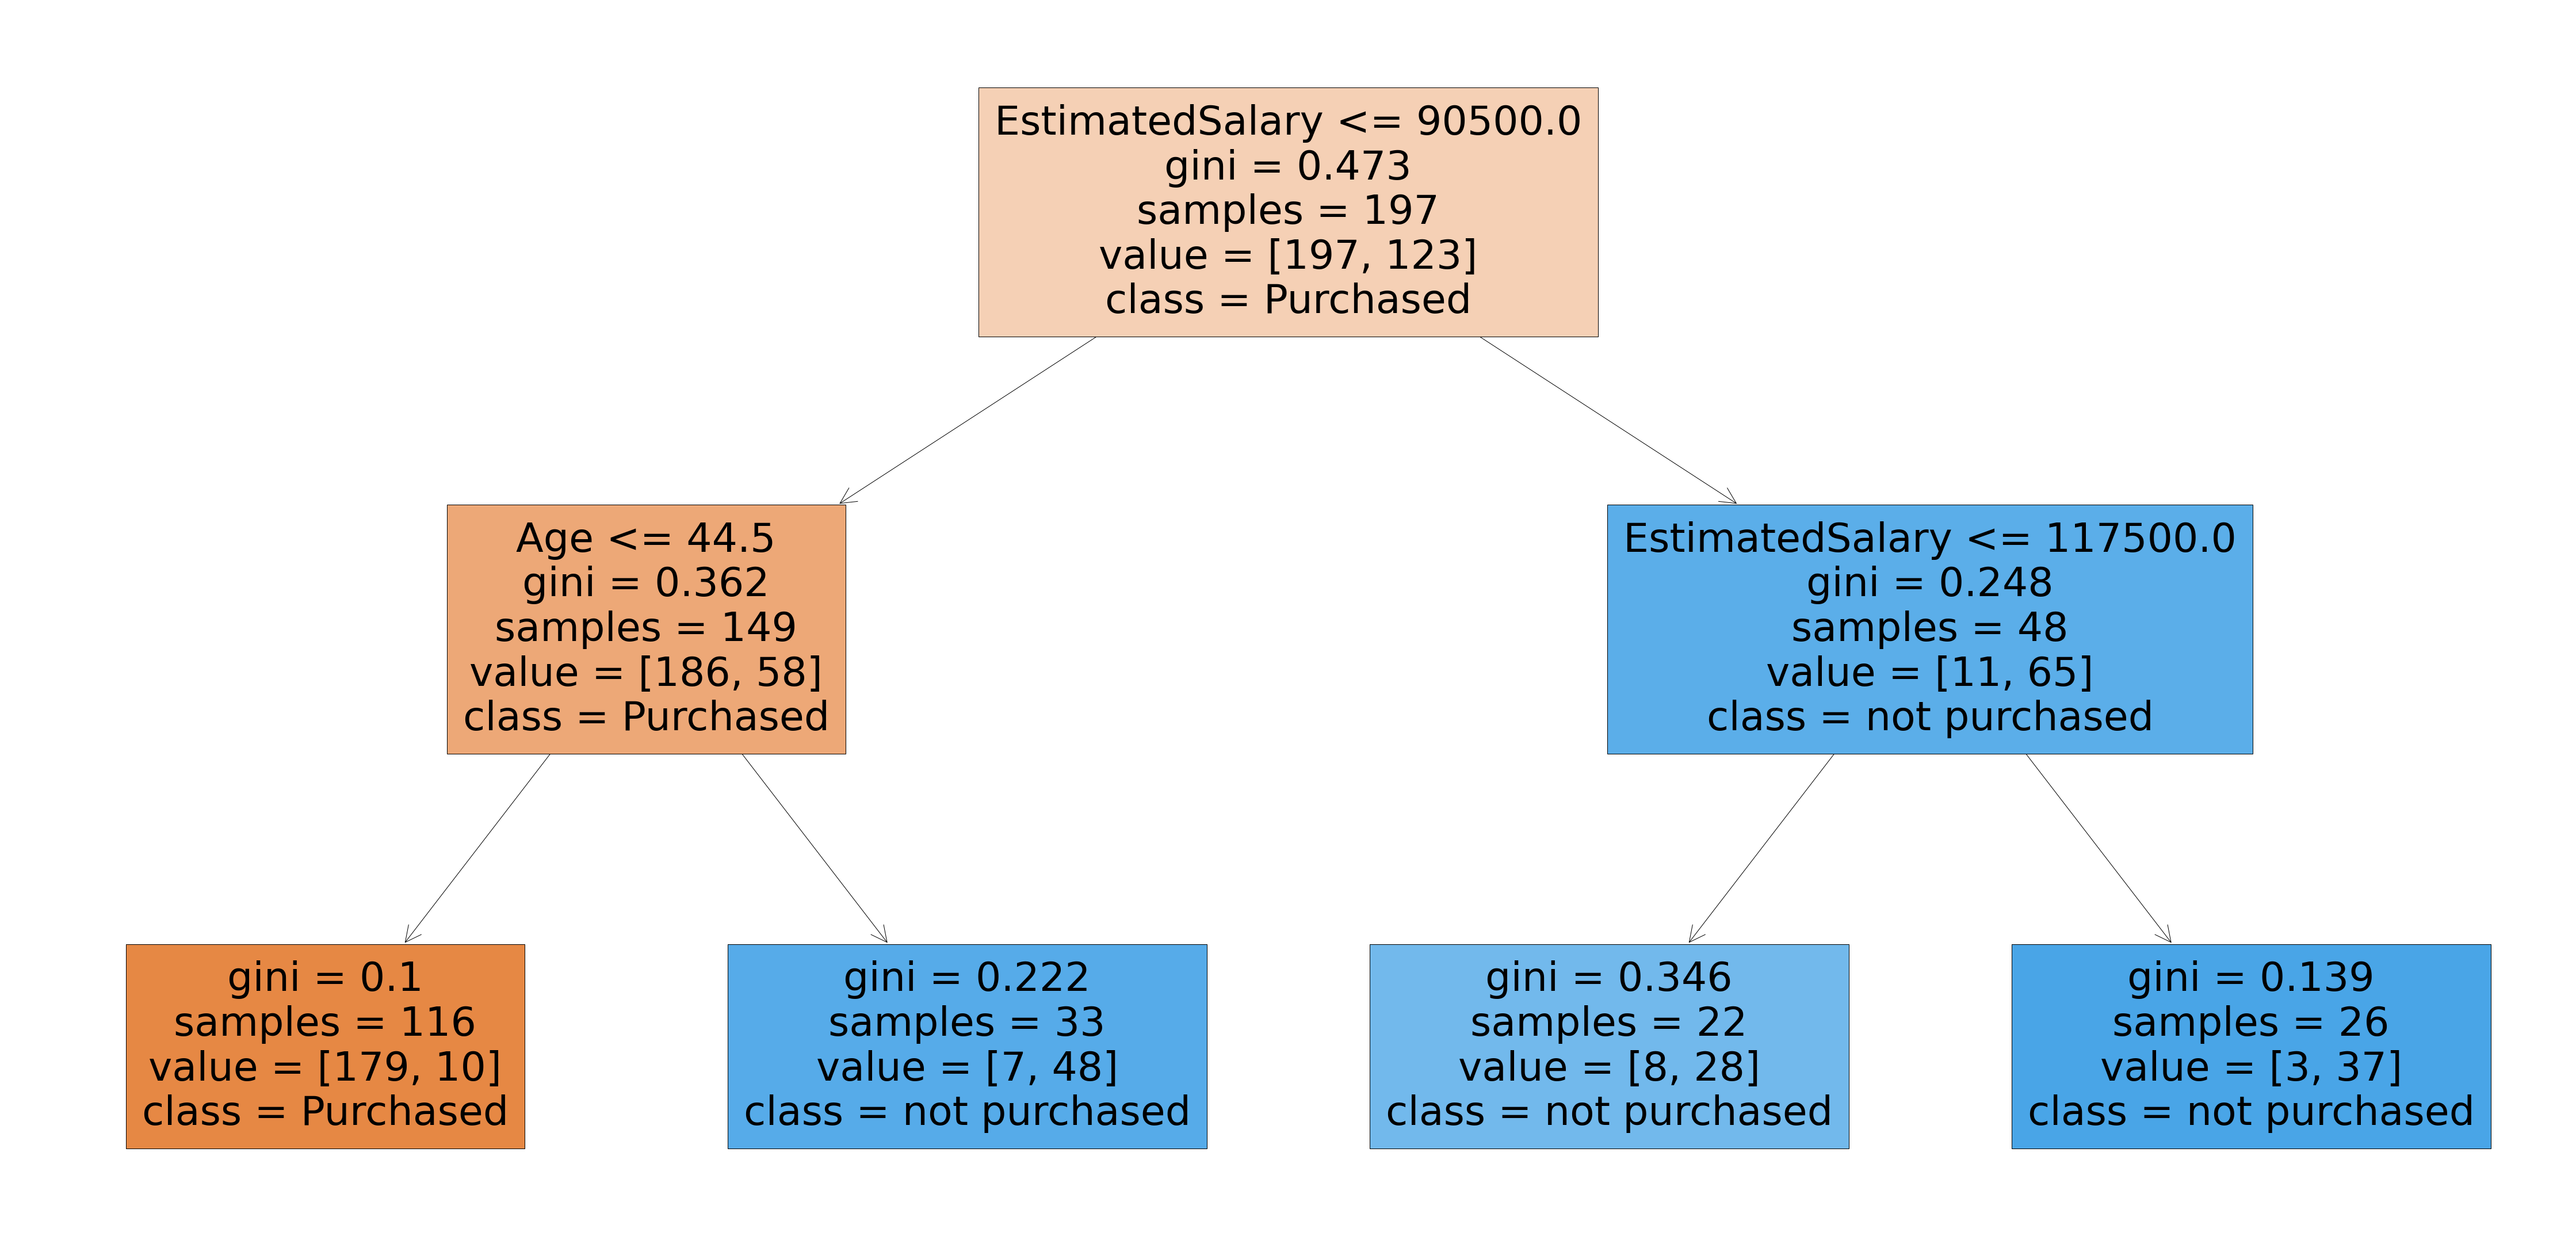

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = x.columns,class_names=["Purchased", "not purchased"],filled=True);
